# SageMath para estudantes de física
***
Rogério T. C.

## Aula V.1
Exemplo baseado [nesse paper](https://arxiv.org/abs/1703.09738)

## Equação de Klein-Gordon no espaço-tempo de Schwarzschild

In [1]:
reset()
%display latex

### Espaço-tempo

In [2]:
var('m', domain='positive')

m

In [3]:
M = Manifold(4, 'M', structure='Lorentzian')
SD.<t, r, th, ph> = M.chart(r"t r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi:periodic")

In [4]:
g = M.metric()
g[0, 0] = - (1 - 2*m/r)
g[1, 1] = 1/(1 - 2*m/r)
g[2, 2] = r^2
g[3, 3] = r^2*sin(th)^2
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [5]:
%time nabla = g.connection()

CPU times: user 5.25 s, sys: 160 ms, total: 5.41 s
Wall time: 4.51 s


### Campo escalar

In [6]:
var ('omega ,k')
R = M.scalar_field(function('R')(r))
S = M.scalar_field(function('S')(th))

In [7]:
Phi = exp(-I*omega*t)*exp(I*k*ph)*R*S

In [8]:
Phi.set_name(name='Phi', latex_name=r'\Phi')

In [9]:
Phi.display()

Phi: M --> R
   (t, r, th, ph) |--> R(r)*S(th)*e^(I*k*ph - I*omega*t)

#### Equação $\quad\nabla^\mu \nabla_\mu \Phi = 0$

In [10]:
%time KG = nabla(nabla(Phi).up(g)).trace()

CPU times: user 11 s, sys: 175 ms, total: 11.1 s
Wall time: 7.71 s


In [11]:
KG.display()

M --> R
(t, r, th, ph) |--> ((2*m*e^(I*k*ph) - r*e^(I*k*ph))*R(r)*cos(th)*sin(th)*d(S)/dth + (2*m*e^(I*k*ph) - r*e^(I*k*ph))*R(r)*sin(th)^2*d^2(S)/dth^2 - (omega^2*r^3*R(r)*e^(I*k*ph) + 2*(2*m^2*e^(I*k*ph) - 3*m*r*e^(I*k*ph) + r^2*e^(I*k*ph))*d(R)/dr + (4*m^2*r*e^(I*k*ph) - 4*m*r^2*e^(I*k*ph) + r^3*e^(I*k*ph))*d^2(R)/dr^2)*S(th)*sin(th)^2 - (2*k^2*m*e^(I*k*ph) - k^2*r*e^(I*k*ph))*R(r)*S(th))*e^(-I*omega*t)/((2*m*r^2 - r^3)*sin(th)^2)

In [12]:
KG = (KG/Phi).expr()

In [13]:
KG.expand()

-omega^2*r^3/(2*m*r^2 - r^3) - 4*m^2*r*diff(R(r), r, r)/((2*m*r^2 - r^3)*R(r)) + 4*m*r^2*diff(R(r), r, r)/((2*m*r^2 - r^3)*R(r)) - r^3*diff(R(r), r, r)/((2*m*r^2 - r^3)*R(r)) - 4*m^2*diff(R(r), r)/((2*m*r^2 - r^3)*R(r)) + 6*m*r*diff(R(r), r)/((2*m*r^2 - r^3)*R(r)) - 2*r^2*diff(R(r), r)/((2*m*r^2 - r^3)*R(r)) - 2*k^2*m/((2*m*r^2 - r^3)*sin(th)^2) + k^2*r/((2*m*r^2 - r^3)*sin(th)^2) + 2*m*cos(th)*diff(S(th), th)/((2*m*r^2 - r^3)*S(th)*sin(th)) - r*cos(th)*diff(S(th), th)/((2*m*r^2 - r^3)*S(th)*sin(th)) + 2*m*diff(S(th), th, th)/((2*m*r^2 - r^3)*S(th)) - r*diff(S(th), th, th)/((2*m*r^2 - r^3)*S(th))

In [14]:
KG = KG*(2*m*r^2-r^3)/(2*m-r)

In [15]:
KG.expand().combine()

-omega^2*r^3/(2*m - r) - (4*m^2*r*diff(R(r), r, r) - 4*m*r^2*diff(R(r), r, r) + r^3*diff(R(r), r, r) + 4*m^2*diff(R(r), r) - 6*m*r*diff(R(r), r) + 2*r^2*diff(R(r), r))/((2*m - r)*R(r)) + (2*m*diff(S(th), th, th) - r*diff(S(th), th, th))/((2*m - r)*S(th)) - (2*k^2*m - k^2*r)/((2*m - r)*sin(th)^2) + (2*m*cos(th)*diff(S(th), th) - r*cos(th)*diff(S(th), th))/((2*m - r)*S(th)*sin(th))

In [16]:
termos = KG.expand().combine().operands();termos

[-omega^2*r^3/(2*m - r),
 -(4*m^2*r*diff(R(r), r, r) - 4*m*r^2*diff(R(r), r, r) + r^3*diff(R(r), r, r) + 4*m^2*diff(R(r), r) - 6*m*r*diff(R(r), r) + 2*r^2*diff(R(r), r))/((2*m - r)*R(r)),
 (2*m*diff(S(th), th, th) - r*diff(S(th), th, th))/((2*m - r)*S(th)),
 -(2*k^2*m - k^2*r)/((2*m - r)*sin(th)^2),
 (2*m*cos(th)*diff(S(th), th) - r*cos(th)*diff(S(th), th))/((2*m - r)*S(th)*sin(th))]

In [17]:
termos[1]

-(4*m^2*r*diff(R(r), r, r) - 4*m*r^2*diff(R(r), r, r) + r^3*diff(R(r), r, r) + 4*m^2*diff(R(r), r) - 6*m*r*diff(R(r), r) + 2*r^2*diff(R(r), r))/((2*m - r)*R(r))

In [18]:
gam = var('gamma')
KG_radial = sum(termos[:2]).canonicalize_radical() == gam
KG_angular = sum(termos[2:]).canonicalize_radical() == gam

In [19]:
KG_radial

-(omega^2*r^3*R(r) + 2*(2*m^2 - 3*m*r + r^2)*diff(R(r), r) + (4*m^2*r - 4*m*r^2 + r^3)*diff(R(r), r, r))/((2*m - r)*R(r)) == gamma

In [20]:
KG_radial = KG_radial*(2*m-r)*R.expr()-gam*(2*m-r)*R.expr();KG_radial

-omega^2*r^3*R(r) - gamma*(2*m - r)*R(r) - 2*(2*m^2 - 3*m*r + r^2)*diff(R(r), r) - (4*m^2*r - 4*m*r^2 + r^3)*diff(R(r), r, r) == 0

In [21]:
KG_angular

-(k^2*S(th) - cos(th)*sin(th)*diff(S(th), th) - sin(th)^2*diff(S(th), th, th))/(S(th)*sin(th)^2) == gamma

In [22]:
desolve(KG_radial, R.expr(), ivar=r, algorithm='fricas')

0

#### Solução numérica

In [23]:
DR = function('DR')(r)

In [24]:
KG_rad = [diff(R.expr(),r)-DR==0,KG_radial.subs({diff(R.expr(),r):DR(r), diff(R.expr(),r,2):diff(DR(r),r)})]

In [25]:
KG_rad

[-DR(r) + diff(R(r), r) == 0,
 -omega^2*r^3*R(r) - gamma*(2*m - r)*R(r) - 2*(2*m^2 - 3*m*r + r^2)*DR(r) - (4*m^2*r - 4*m*r^2 + r^3)*diff(DR(r), r) == 0]

In [26]:
KG_rad[1] = KG_rad[1].subs(m=0.1, omega=.2, gamma=2.0);KG_rad[1]

-0.0400000000000000*r^3*R(r) - 2*(r^2 - 0.300000000000000*r + 0.0200000000000000)*DR(r) + 2.00000000000000*(r - 0.200000000000000)*R(r) - (r^3 - 0.400000000000000*r^2 + 0.0400000000000000*r)*diff(DR(r), r) == 0

In [27]:
KG_rad[0] = solve(KG_rad[0],diff(R.expr(),r))[0].right()
KG_rad[1] = solve(KG_rad[1],diff(DR(r),r))[0].right()

In [28]:
KG_rad

[DR(r),
 -((50*r^2 - 15*r + 1)*DR(r) + (r^3 - 50*r + 10)*R(r))/(25*r^3 - 10*r^2 + r)]

In [29]:
var('x,y')

(x, y)

In [30]:
KG_rad[0] = KG_rad[0].subs({DR(r):y})
KG_rad[1] = KG_rad[1].subs({DR(r):y, R.expr():x})

In [31]:
KG_rad

[y, -((r^3 - 50*r + 10)*x + (50*r^2 - 15*r + 1)*y)/(25*r^3 - 10*r^2 + r)]

In [32]:
radsol = desolve_system_rk4(KG_rad, [x,y], ics =[0.3 ,1 ,0.5], ivar=r, end_points=100, step=0.01)

In [33]:
len(radsol)

9971

In [34]:
points =[[ i , j ] for i ,j,k  in radsol ]

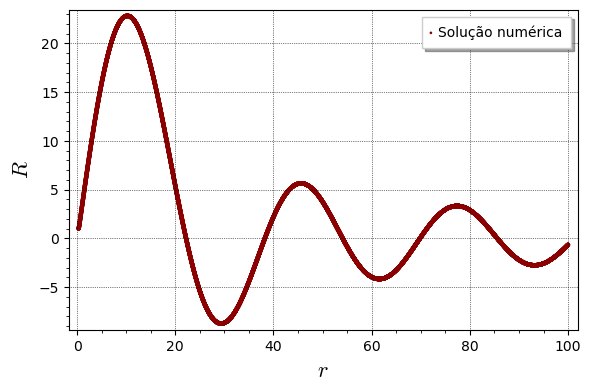

In [35]:
list_plot(points, axes_labels =['$r$' , '$R$'], color='darkred', legend_label = 'Solução numérica',
           gridlines=True, frame=True, axes=False)

#### Variando $\omega$ entre 0,1 e 2,5

In [36]:
pl = []
for om in srange(0.1,2.6,.3):
    KG_rad = [diff(R.expr(),r)-DR==0,KG_radial.subs({diff(R.expr(),r):DR(r), diff(R.expr(),r,2):diff(DR(r),r)})]
    KG_rad[0] = solve(KG_rad[0],diff(R.expr(),r))[0].right().subs({DR(r):y})
    KG_rad[1] = solve(KG_rad[1].subs(m=0.1, omega=om, gamma=2.0),diff(DR(r),r))[0].right().subs({DR(r):y, R.expr():x})
    radsol = desolve_system_rk4 (KG_rad, [x,y], ics =[0.3 ,1 ,0.5], ivar=r, end_points=100, step=0.01)
    pl.append(list_plot([[i,j] for i,j,k in radsol], axes_labels =['$r$' , '$R$'], color='darkred', 
              legend_label = r'$\omega='+str(om.n(digits=3))+'$', gridlines=True, frame=True, axes=False))

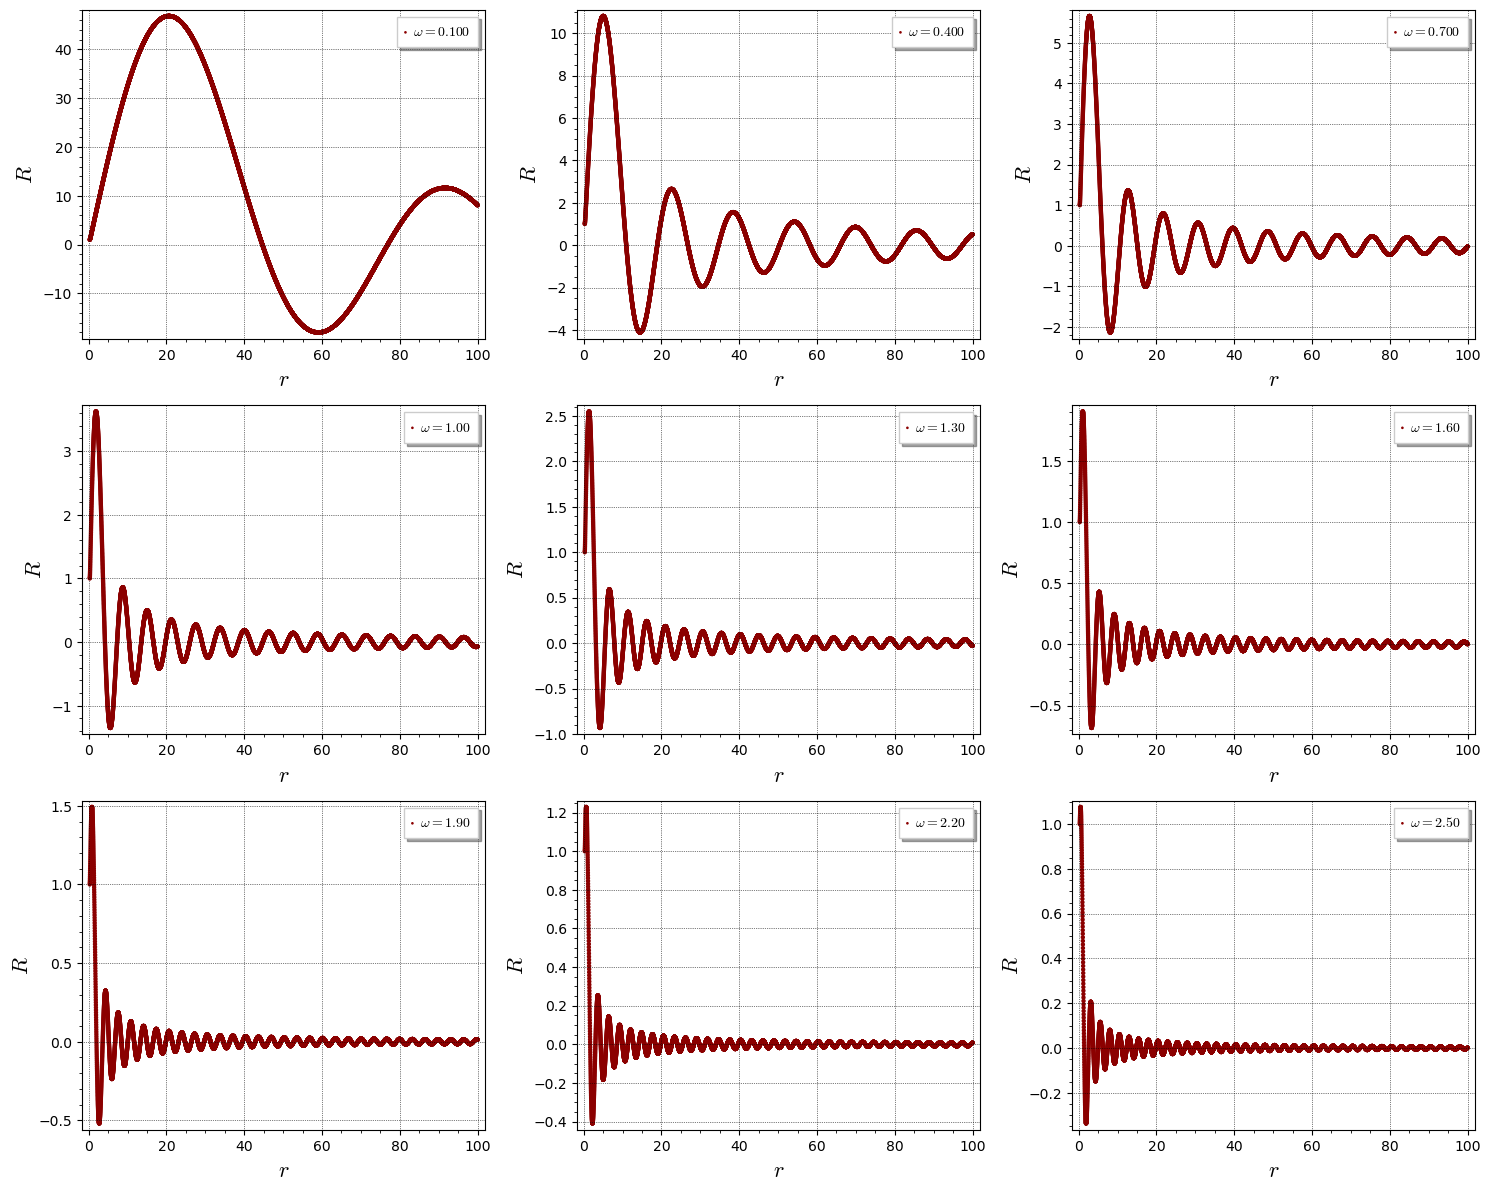

In [37]:
ga = graphics_array(pl, nrows=3)
ga.show(figsize=[15,12])